# Imports

In [1]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [2]:
n = 5
label_name = "stat9"
layers = [2]

epochs = 1000
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 64

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [3]:
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [4]:
for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")

Epoch 0, Loss 1.395763099193573
Epoch 1, Loss 1.3838675618171692
Epoch 2, Loss 1.3991308808326721
Epoch 3, Loss 1.3735113143920898
Epoch 4, Loss 1.3779065012931824
Epoch 5, Loss 1.377310037612915
Epoch 6, Loss 1.346956729888916
Epoch 7, Loss 1.3398288488388062
Epoch 8, Loss 1.3583163619041443
Epoch 9, Loss 1.384045958518982
Epoch 10, Loss 1.3774718046188354
Epoch 11, Loss 1.3789125680923462
Epoch 12, Loss 1.3645727634429932
Epoch 13, Loss 1.32645183801651
Epoch 14, Loss 1.3555296063423157
Epoch 15, Loss 1.3657277822494507
Epoch 16, Loss 1.3344988822937012
Epoch 17, Loss 1.3846368193626404
Epoch 18, Loss 1.3552975058555603
Epoch 19, Loss 1.3487789034843445
Epoch 20, Loss 1.3599514365196228
Epoch 21, Loss 1.3472446203231812
Epoch 22, Loss 1.3347737193107605
Epoch 23, Loss 1.3491670489311218
Epoch 24, Loss 1.3302974700927734
Epoch 25, Loss 1.3349506855010986
Epoch 26, Loss 1.3266897201538086
Epoch 27, Loss 1.30124032497406
Epoch 28, Loss 1.3120115995407104
Epoch 29, Loss 1.343750298023223

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

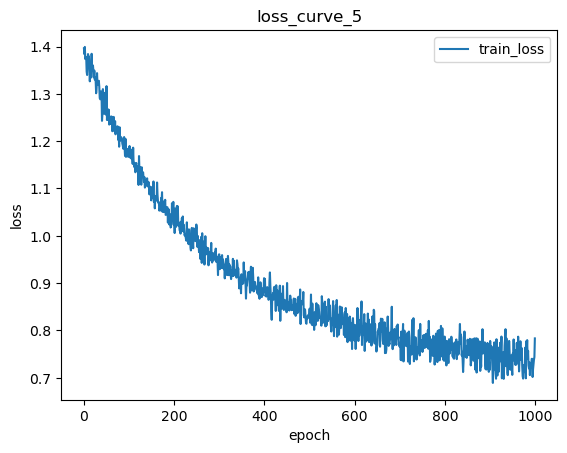

In [5]:
plt.figure()
plt.plot(losses, label='train_loss')
plt.title(f'loss_curve_{n}')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.savefig(f'figures/{label_name}_{n}.png')

# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

[[48, 12], [6, 30]]
Accuracy for class 0 = 80.0%
Accuracy for class 1 = 83.33333333333333%
Overall accuracy = 81.25%


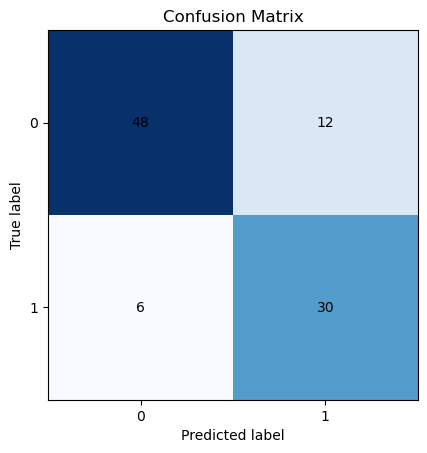

In [6]:
confustion_matrix = evaluate_model(model, training_dataset)
print(confustion_matrix)
confustion_matrix.print_accuracy()
confustion_matrix.plot()

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

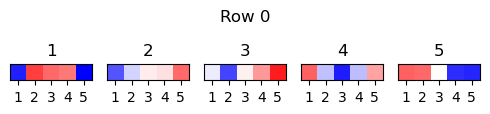

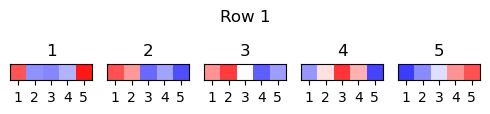

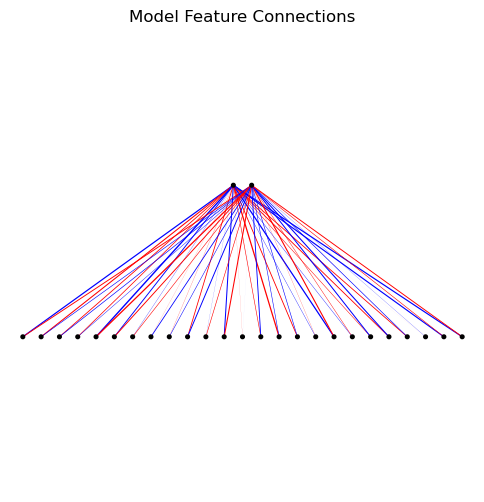

In [7]:
for i in range(len(layers)):
    for index in range(model.layers[i].weight.shape[0]):
        model.plot_heatmap_feature(i, index)
model.plot_connections()